# Analytics Evaluation - Task 2 (Wong Jiong Soon) 

1. Import all the required libraries.


In [44]:
# Import all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from xgboost import XGBRegressor


2.Read the basic infos about the dataset


In [45]:
data = pd.read_csv('palm_ffb.csv')

<AxesSubplot:>

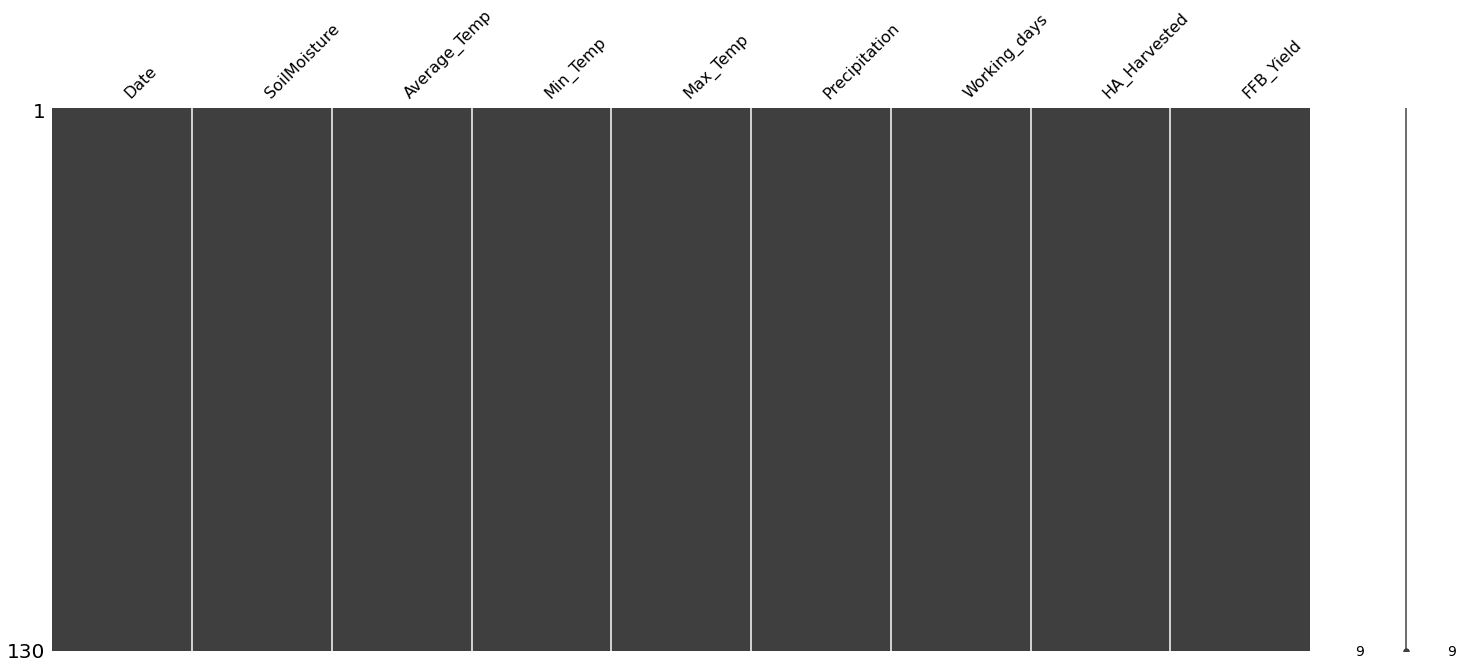

In [46]:
#check if there is missing no
msno.matrix(data)

In [47]:
data.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [48]:
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [49]:
data.tail()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91
129,01.10.2018,510.8,26.819355,21.0,34.4,207.0,26,771805.3922,2.04


In [50]:
data.shape

(130, 9)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [52]:
#Display the skewness and kurtosis value
#Skewness is the measure of symmetry
#Kurtosis is the standard normal distribution which positive kurtosis indicates "heavy-tailed", negative kurtosis indicates "light-tailed"
d_skew = data.skew() 
d_kurt = data.kurt()

frame = { 'Skewness': d_skew, 'Kurtosis': d_kurt } 
  
df_skew_kurt = pd.DataFrame(frame)

df_skew_kurt

,Skewness,Kurtosis
SoilMoisture,-0.394336,-0.262867
Average_Temp,-0.340606,0.141138
Min_Temp,-1.121358,2.000500
Max_Temp,-0.215635,-0.591251
Precipitation,0.526227,1.206761
Working_days,-0.660814,0.565301
HA_Harvested,-0.064445,0.085981
FFB_Yield,0.188629,-0.670960


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Normal'}, xlabel='FFB_Yield', ylabel='Density'>

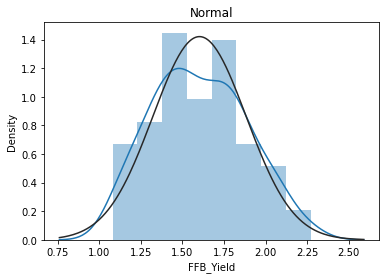

In [53]:
#Plot the distribution graph for the fresh fruit bunch yield, since the fresh fruit bunch yield is the label in this case.
y = data['FFB_Yield']
plt.figure; plt.title('Normal')
sns.distplot(y, fit=st.norm)

Besides FFB yield, explore the distributions for other features

Number of numerical variables:  9


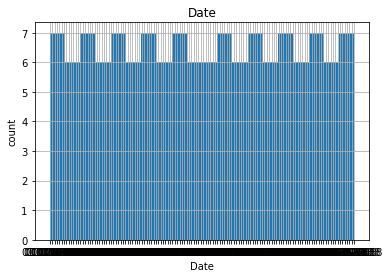

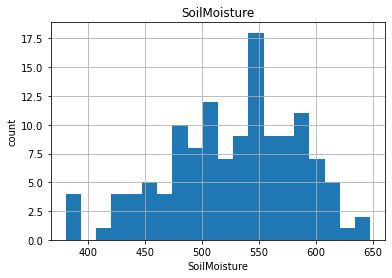

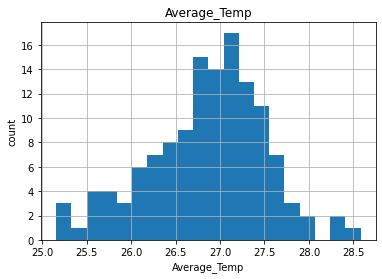

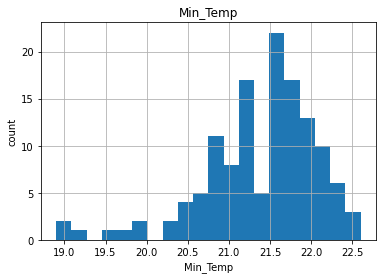

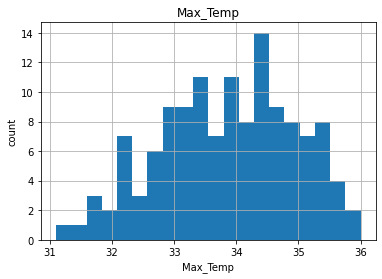

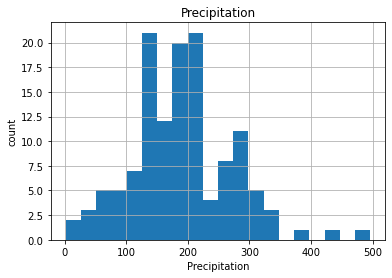

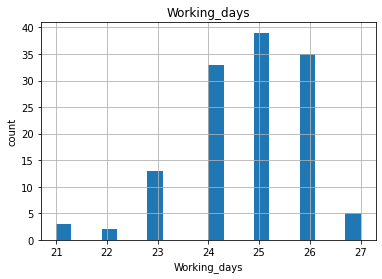

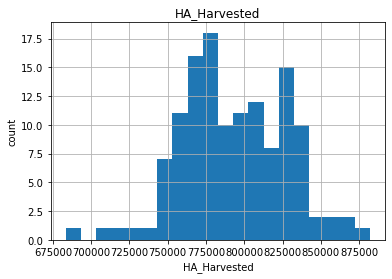

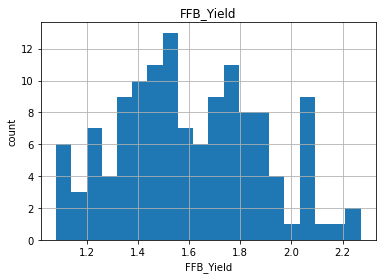

In [54]:
# list of numerical variables
var_no= [var for var in data.columns]

print('Number of numerical variables: ', len(var_no))

# visualise the numerical variables
data[var_no].head()

# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in var_no:
    analyse_continous(data, var)

3. Using Scatter Plots to explore the behaviour pattern between FFB Yield (Label) and other features.

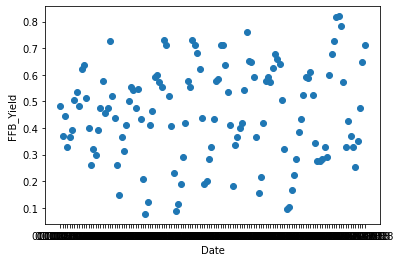

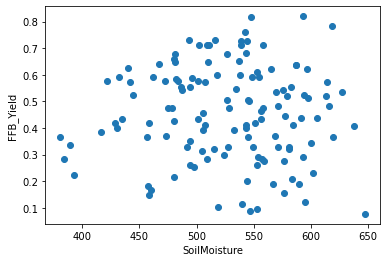

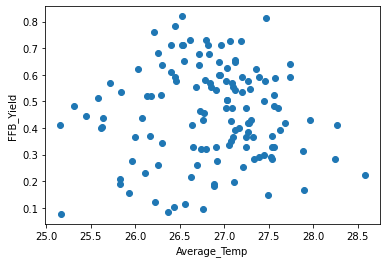

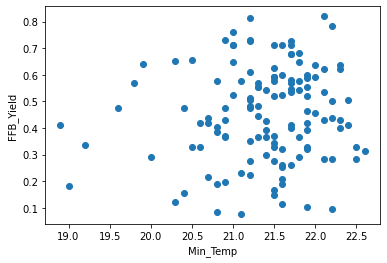

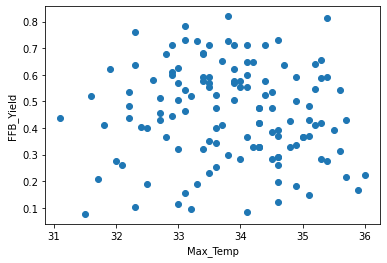

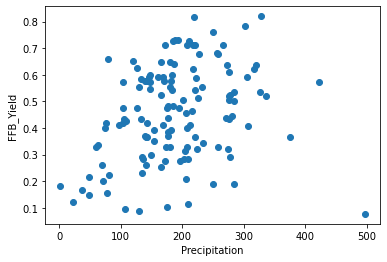

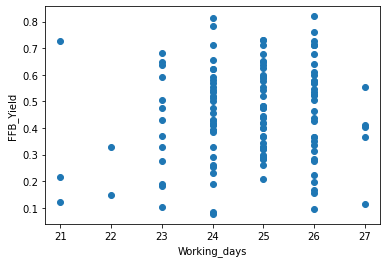

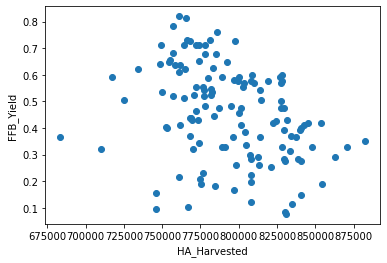

In [55]:
def relationship_ffbyield_and_other_features(df, var):
    df = df.copy()
    df['FFB_Yield'] = np.log(df['FFB_Yield'])
    plt.scatter(df[var], df['FFB_Yield'])
    plt.ylabel('FFB_Yield')
    plt.xlabel(var)
    plt.show()

for var in var_no:
    if var !='FFB_Yield':
        relationship_ffbyield_and_other_features(data, var)

The important result to take note here is the positive linear relationship between FFB_yield and precipitaiton. So the higher the precipitation, the higher the fresh fruit bunch yield.

In [56]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='baseline', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

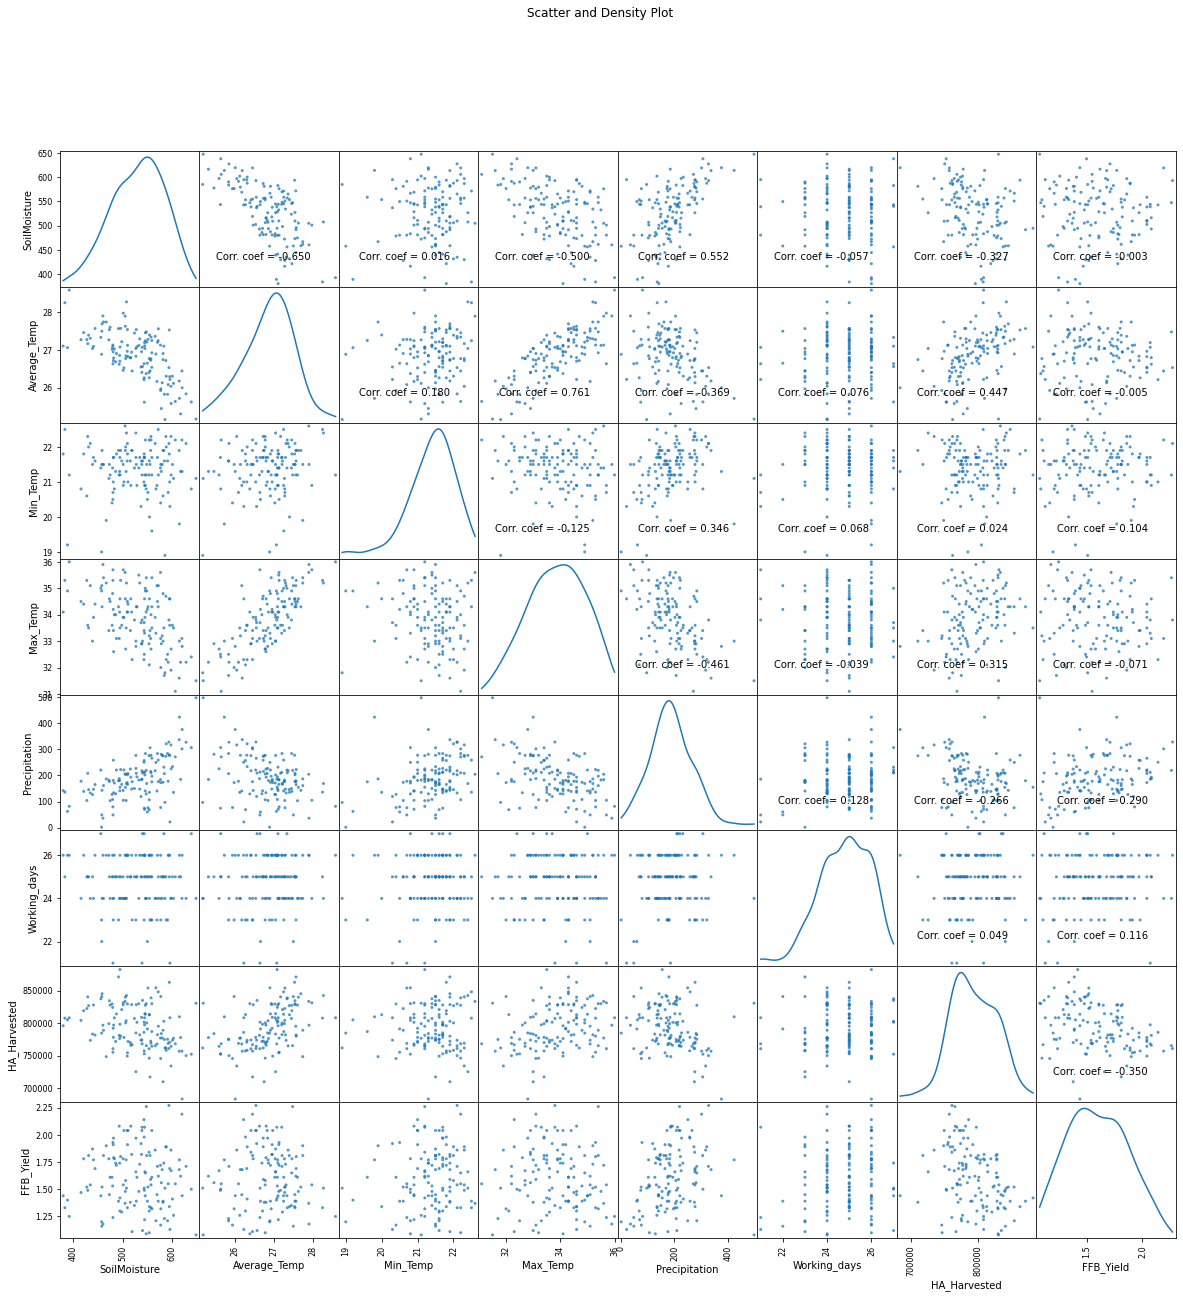

In [57]:

plotScatterMatrix(data, 20, 10)


4.After getting the scatter and density plot, it is crucial to find the correlation coffecient between all the features and label.

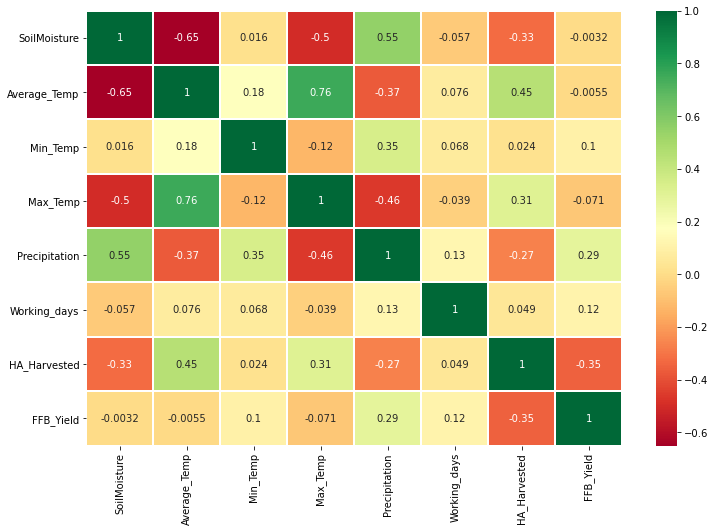

In [58]:
#Using Pearson Correlation
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [59]:
#List down the correlation coefficient ascendingly
correlation = data[var_no].corr()
print(abs(correlation['FFB_Yield'].sort_values(ascending = True)),'\n')

HA_Harvested     0.350222
Max_Temp         0.071201
Average_Temp     0.005494
SoilMoisture     0.003183
Min_Temp         0.103830
Working_days     0.116364
Precipitation    0.289604
FFB_Yield        1.000000
Name: FFB_Yield, dtype: float64 



In [60]:
#Selecting highly correlated features
relevant_features = correlation[correlation>0.1]
relevant_features

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,NaN,NaN,NaN,0.552001,NaN,NaN,NaN
Average_Temp,NaN,1.000000,0.180396,0.761083,NaN,NaN,0.446515,NaN
Min_Temp,NaN,0.180396,1.000000,NaN,0.345944,NaN,NaN,0.103830
Max_Temp,NaN,0.761083,NaN,1.000000,NaN,NaN,0.314827,NaN
Precipitation,0.552001,NaN,0.345944,NaN,1.000000,0.127897,NaN,0.289604
Working_days,NaN,NaN,NaN,NaN,0.127897,1.000000,NaN,0.116364
HA_Harvested,NaN,0.446515,NaN,0.314827,NaN,NaN,1.000000,NaN
FFB_Yield,NaN,NaN,0.103830,NaN,0.289604,0.116364,NaN,1.000000


5. Out of all the features, it is crucial to do feature selection.

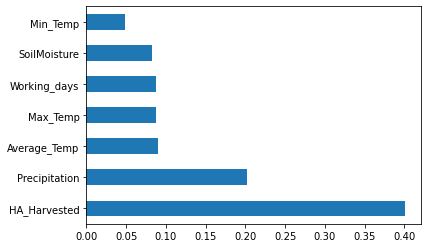

               Importance
HA_Harvested     0.401089
Precipitation    0.202245
Average_Temp     0.089838
Max_Temp         0.088009
Working_days     0.087854
SoilMoisture     0.082905
Min_Temp         0.048060


In [61]:
X = data.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = data.FFB_Yield    #target column i.e FFB_Yield

# Use XGBRessor to fit the model in order to determine which features contribute to higher accuracies.
xgb = XGBRegressor()
xgb.fit(X, y)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp = imp.sort_values(['Importance'], ascending = False)

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(imp)

From the chart and the importance score, it can be deduced that HA_harvested is the most important feature and followed by precipitation.

# Conclusion

1. From the scatter and density plot, it can be deduced that all the features and label are relatively normally distributed.
2. From the person correlation, it is shown that percipitation has the highest positivbe correlation coefficient with FFB_yield whereas HA_Harvested has the highest negative correlation coefficient.So both of these are the factors that have strong coefficient.
3. This can be proven by fitting the model with XGBRessor and derive that indeed both HA_Harvested and Precipitation are the strong features to be selected from the importance score which both are more than 0.1 and others are less than 0.1.